<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

### Dataset

In [3]:
# Load the dataset
noise = pd.read_csv(
    "data/airfoil_self_noise.dat",
    delimiter="\t",
    names=[
        "frequency",
        "angle",
        "chord_length",
        "free_stream_velocity",
        "displacement_thickness",
        "self_noise",
    ],
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

-This is a physics dataset from NASA that measures the impact of airfoils and their position on sound. All columns in this dataset are numerical and there are 5 feature columns that can be used to help predict scaled sound pressure levels. A ML model can help scientists understand the optimal features for reducing noise. Being able to predict noise levels can be useful in the design stages of future airfoils or help determine the ideal location to place noisier airfoils

- Find out how many rows and columns are in `noise`.

In [6]:
noise.shape
#1503 rows, 6 columns

(1503, 6)

- Find out what data types are present.

In [7]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [8]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [9]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

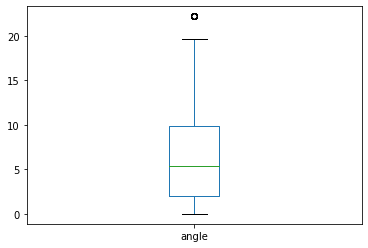

In [11]:
ax = noise.loc[:, "angle"].plot.box()

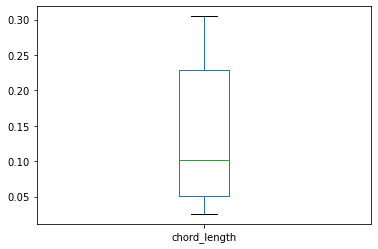

In [12]:
ax = noise.loc[:, "chord_length"].plot.box()

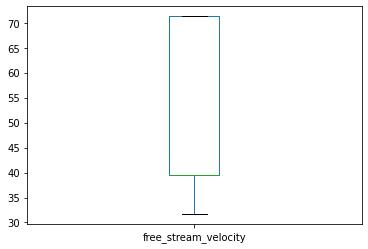

In [13]:
ax = noise.loc[:, "free_stream_velocity"].plot.box()

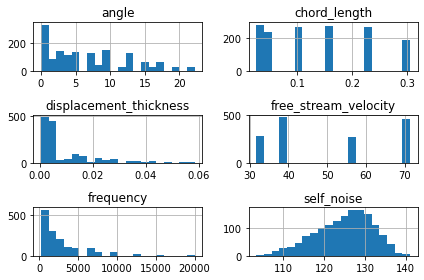

In [14]:
axes = noise.hist(bins=20)
axes[0, 0].get_figure().tight_layout()

- Which variables are approximately normally distributed?

<li>self noise</li>
<li> chord legnth </li> 
<li>angle</li>

- Which variables show strong skew?

<li>displacement thickness</li> <li>frequency </li>

- Make a scatterplot of each feature variable with the target variable "self_noise".

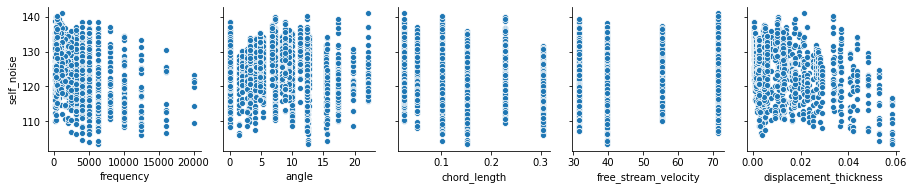

In [15]:
g = sns.pairplot(
    data=noise,
    x_vars=noise.columns.drop("self_noise"),
    y_vars=["self_noise"]
   
)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

In [16]:
noise.corr()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
displacement_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
self_noise,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


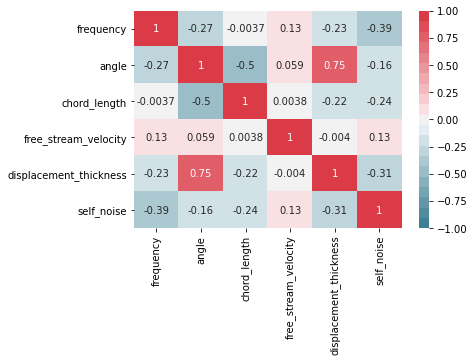

In [17]:
ax = sns.heatmap(
    noise.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21),
    annot=True
)

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

##### 1.) Not noticing a linear correlation between our feature variables and self noise. 2.) Given that we are working with different measurements may need to standardize our features at some point. 

### Linear Regression

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [23]:
X = noise.drop("self_noise", axis="columns")
y = noise.loc[:, "self_noise"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [25]:
from sklearn.linear_model import LinearRegression
lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)

LinearRegression()

In [26]:
print("Training-set R-squared:", lr_3.score(X_train, y_train))
print("Test-set R-squared:", lr_3.score(X_test, y_test))

Training-set R-squared: 0.5091856804447686
Test-set R-squared: 0.5287166709832288


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

##### Our model performed better than the "null model." Our model's mean squared error is 50% percent smaller than the null model's - which just predicts the average self noise each time.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

##### While the model performed similarly on the test and train set, the training set seems to have performed fairly poorly. The small gap between train & test indicates the model doesnt appear to be over or under fitting, indicating there is a good balance between variance and bias. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

##### The model appears to have more of a bias problem. While it is hard to say for sure I feel like we can improve the training score. We aren't seeing a big variance problem given the small gap between test/train set

### Random Forest

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestRegressor` and then use `RandomForestRegressor` like any other scikit-learn estimator.

In [22]:
target_col = "self_noise"
X = noise.drop("self_noise", axis="columns")
y = noise.loc[:, "self_noise"]

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
rfr.fit(X_train, y_train)
print("Training-set R-squared:", rfr.score(X_train, y_train))
print("Test-set R-squared:", rfr.score(X_test, y_test))

Training-set R-squared: 0.9889474867351201
Test-set R-squared: 0.9224500851537936


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

##### random forest performed a lot better in terms of overall predictive performance. That being said, the overall variance of the RF model is higher (train set performed better than test set). Random forest has more of a variance problem than bias

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [30]:
#because we have multiple features on different scales we should attempt to standardize our features. 

from sklearn.preprocessing import StandardScaler



In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X = noise.drop("self_noise", axis="columns")
y = noise.loc[:, "self_noise"]

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

0.5176192435416569
0.512993927985931


In [37]:
#standardizing our features in of itself didn't do anything. 
#Will try making the model more complex by adding nominal features 
#Polynomial Features will allow us to add our to the powers 2 through 3. 

In [35]:
from sklearn.preprocessing import PolynomialFeatures
pf= PolynomialFeatures(degree=3,include_bias=False)
X_train = pf.fit_transform(X_train)
X_test  = pf.fit_transform(X_test)
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
print(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))

0.756047382145806
0.7547373028388771


*When we add powers 2 through 5 the model performs better but we see that it overfits. Degree=3 improves our score without overfitting the model* 

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

### Dataset

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This dataset contains information regarding credit card applications. It is consistent of both numerical and categorical data and has several missing values. Also worth noting that the columns are unnamed. Given how many applications banks must receive, manual evaluation of applications is likely time consuming and prone to error. a good ML model can help save time, and provide a more accurate, streamlined reading of these appications 

In [28]:
# Load the dataset
credit = pd.read_csv("data/crx.data", names=range(1, 17))

- Find out how many rows and columns are in `credit`.

In [29]:
credit.shape
#690 rows, 16 columns

(690, 16)

- Find out what data types are present.

In [31]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [32]:
credit = credit.replace(to_replace='?',value=np.nan)

In [33]:
credit[[2, 14]] = credit[[2, 14]].apply(pd.to_numeric)

In [34]:
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14    float64
15      int64
16     object
dtype: object

- Find out how many null values there are in each columns.

In [35]:
credit.isna().sum()

1     12
2     12
3      0
4      6
5      6
6      9
7      9
8      0
9      0
10     0
11     0
12     0
13     0
14    13
15     0
16     0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [36]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       678 non-null    object 
 1   2       678 non-null    float64
 2   3       690 non-null    float64
 3   4       684 non-null    object 
 4   5       684 non-null    object 
 5   6       681 non-null    object 
 6   7       681 non-null    object 
 7   8       690 non-null    float64
 8   9       690 non-null    object 
 9   10      690 non-null    object 
 10  11      690 non-null    int64  
 11  12      690 non-null    object 
 12  13      690 non-null    object 
 13  14      677 non-null    float64
 14  15      690 non-null    int64  
 15  16      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [37]:
credit_description = credit.describe()
print(credit_description)

               2           3           8          11           14  \
count  678.000000  690.000000  690.000000  690.00000   677.000000   
mean    31.568171    4.758725    2.223406    2.40000   184.014771   
std     11.957862    4.978163    3.346513    4.86294   173.806768   
min     13.750000    0.000000    0.000000    0.00000     0.000000   
25%     22.602500    1.000000    0.165000    0.00000    75.000000   
50%     28.460000    2.750000    1.000000    0.00000   160.000000   
75%     38.230000    7.207500    2.625000    3.00000   276.000000   
max     80.250000   28.000000   28.500000   67.00000  2000.000000   

                  15  
count     690.000000  
mean     1017.385507  
std      5210.102598  
min         0.000000  
25%         0.000000  
50%         5.000000  
75%       395.500000  
max    100000.000000  


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

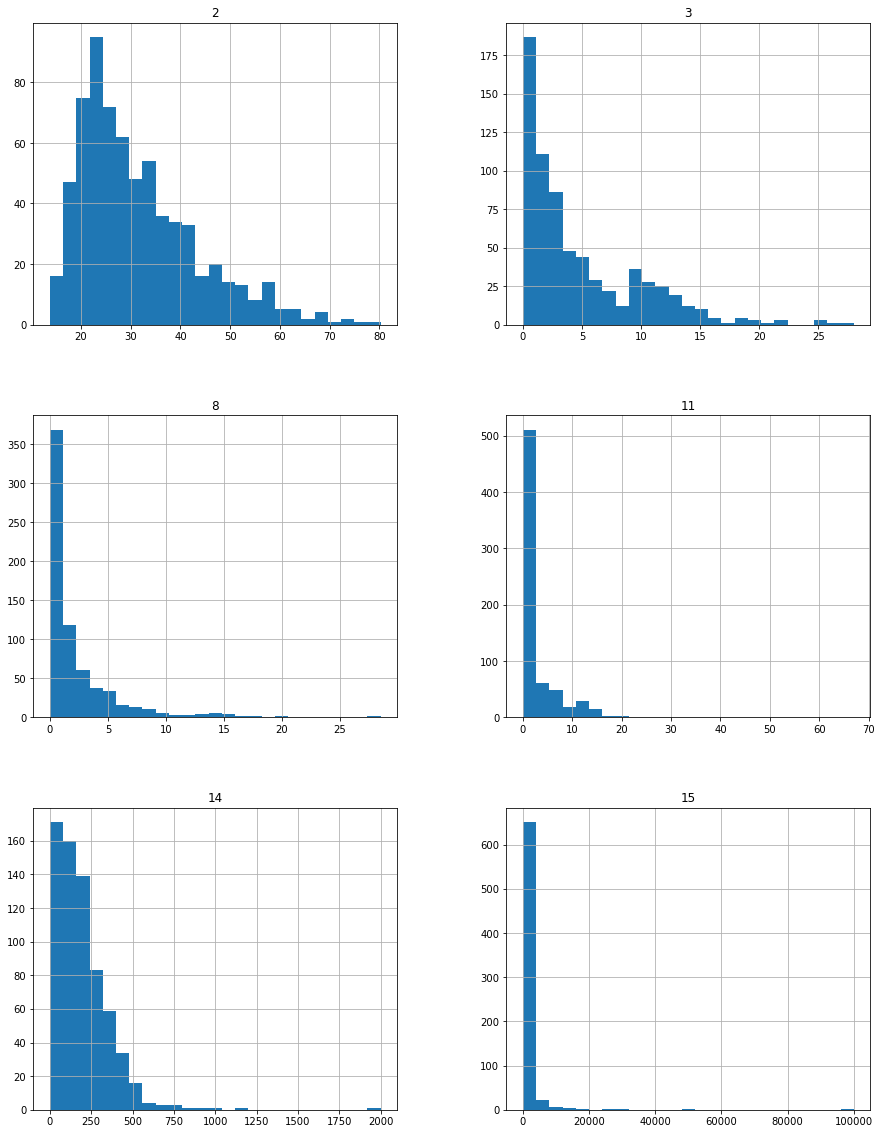

In [38]:
##numerical column distribution
ax1 = credit.hist(figsize=(15,20), bins = 25)

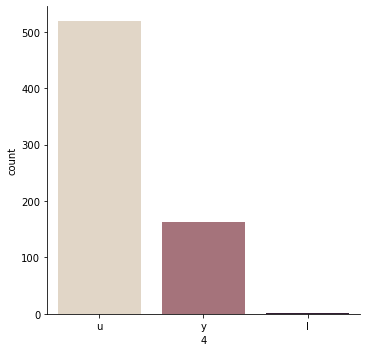

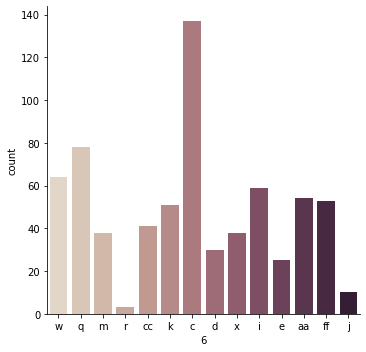

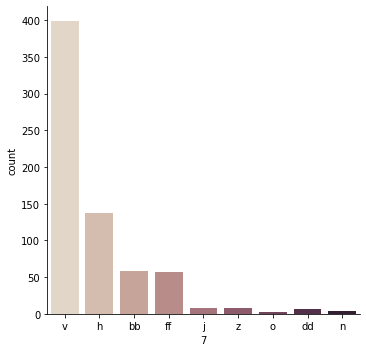

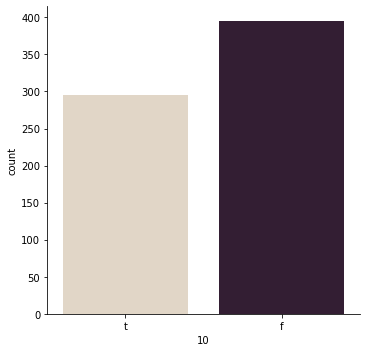

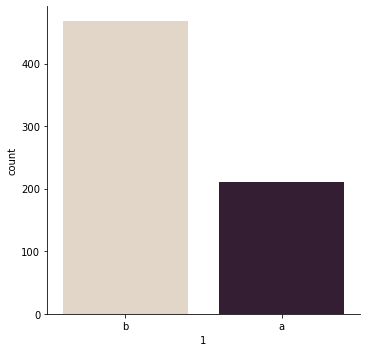

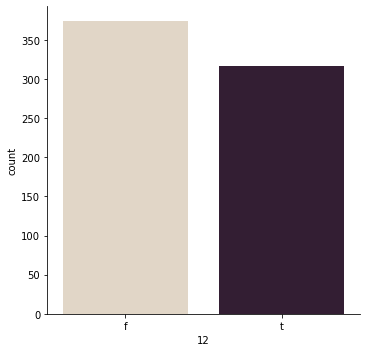

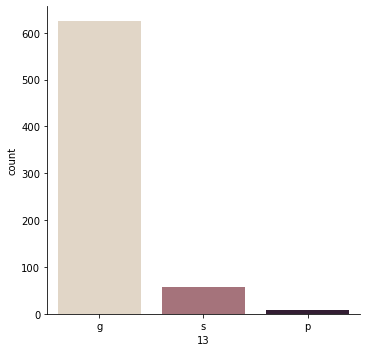

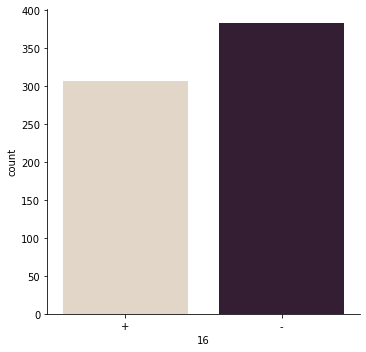

In [39]:
#categorical feature distribution

sns.catplot(x=4, kind="count", palette="ch:.25", data=credit)
sns.catplot(x=6, kind="count", palette="ch:.25", data=credit)
sns.catplot(x=7, kind="count", palette="ch:.25", data=credit)
sns.catplot(x=10, kind="count", palette="ch:.25", data=credit)
sns.catplot(x=1, kind="count", palette="ch:.25", data=credit)
sns.catplot(x=12, kind="count", palette="ch:.25", data=credit)
sns.catplot(x=13, kind="count", palette="ch:.25", data=credit)
sns.catplot(x=16, kind="count", palette="ch:.25", data=credit)

- Which variables are approximately normally distributed?

6, 10, 12

- Which variables show strong skew?

15, 8, 7, 4, 13

- Make a scatterplot of each feature variable with the target variable (`16`).

In [40]:
#since our outcome is categorical, I will calculate the mean value of the target for each class of the numerical features
#going to drop column 15 and visualize it separately since it won't all fit in one chart

In [43]:
credit_new = credit.rename(columns={3: "3A", 2: "2A",8: "8A", 11: "11A",14: "14A",15: "15A",16: "16A"})

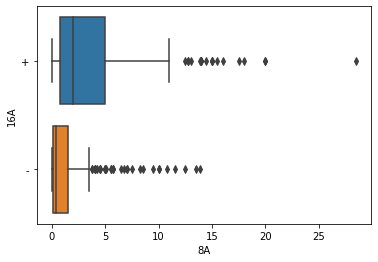

In [44]:
ax1 = sns.boxplot(x="8A", y="16A", data=credit_new)

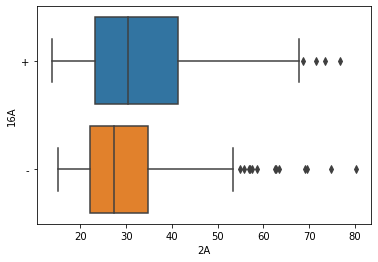

In [45]:
ax4 = sns.boxplot(x="2A", y="16A", data=credit_new)

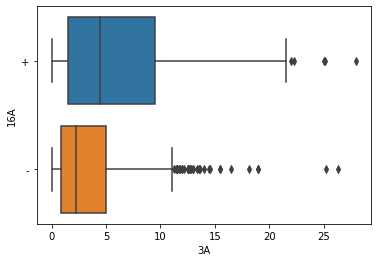

In [46]:
ax5 = sns.boxplot(x="3A", y="16A", data=credit_new)

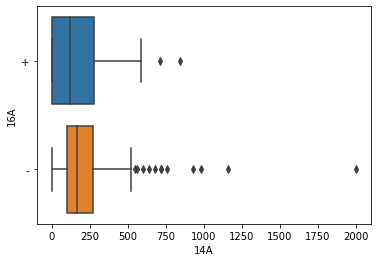

In [47]:
ax3 = sns.boxplot(x="14A", y="16A", data=credit_new)

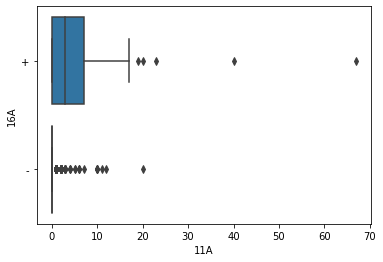

In [48]:
ax5 = sns.boxplot(x="11A", y="16A", data=credit_new)

In [49]:
mean_by_outcome=credit.groupby(16).agg("mean")

In [50]:
mean_by_credit_outcome= mean_by_outcome.drop({15,14}, axis="columns")

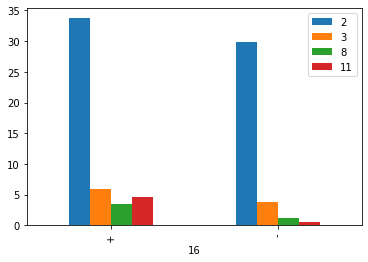

In [51]:
ax = mean_by_credit_outcome.plot.bar()

In [52]:
mean_by_credit_outcome1= mean_by_outcome.drop({2,3,8,11}, axis="columns")

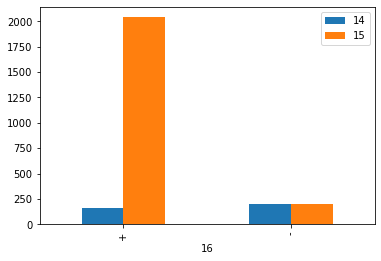

In [53]:
ax = mean_by_credit_outcome1.plot.bar()

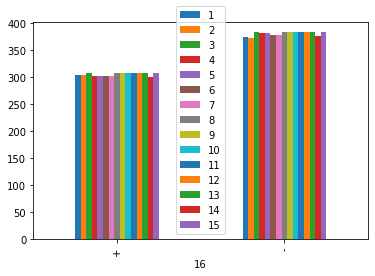

In [54]:
count_by_outcome2=credit.groupby(16).agg("count")
count_by_outcome2.plot.bar()

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

In [55]:
credit.corr() 

,2,3,8,11,14,15
2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


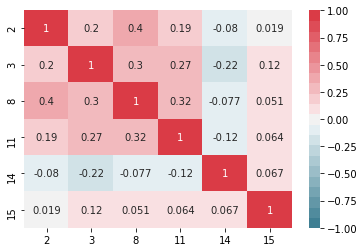

In [56]:
ax = sns.heatmap(
    credit.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21),
    annot=True
)

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

This dataset has several columns with null values.We don't know what each column represents. This makes it hard to make an educated guess to fill in that data.Some ways we can deal with the missing values, is replace the NA values with the mean for continous variables, or the most common value for categorical values. I will just drop the rows with missing values for our first pass model. 

Additionally there is a lot of categorical data. In order to find the correlation between our feature and target variables we should convert our target variable into a numerical feature (0,1) to more easily determine relationship between our features

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [112]:
credit.loc[:,16].value_counts()

-    383
+    307
Name: 16, dtype: int64

~55%

### Logistic Regression

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [60]:
credit_model=pd.get_dummies(credit, columns=[1,4,5,6,7,9,10,12,13],drop_first=True)

In [61]:
credit_model.columns

Index([     2,      3,      8,     11,     14,     15,     16,  '1_b',  '4_u',
        '4_y', '5_gg',  '5_p',  '6_c', '6_cc',  '6_d',  '6_e', '6_ff',  '6_i',
        '6_j',  '6_k',  '6_m',  '6_q',  '6_r',  '6_w',  '6_x', '7_dd', '7_ff',
        '7_h',  '7_j',  '7_n',  '7_o',  '7_v',  '7_z',  '9_t', '10_t', '12_t',
       '13_p', '13_s'],
      dtype='object')

In [106]:
X = credit_model.drop([16], axis="columns").dropna(axis="columns")
y = credit_model.loc[:, 16]

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
from sklearn.linear_model import LogisticRegression
lr_credit = LogisticRegression( max_iter=10000)
lr_credit.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [110]:
print(lr_credit.score(X_train, y_train))
print(lr_credit.score(X_test, y_test))

0.8592132505175983
0.8743961352657005


In [65]:
y_test.value_counts(normalize=True)

-    0.536232
+    0.463768
Name: 16, dtype: float64

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

##### Our model performed better than the null model. Can't tell much about the variance from comparing null model to training set, but will assume that we can improve bias despite not knowing optimal performance of a ML model

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

##### Train and Test set performed pretty similarly. Both the training and testing set performed pretty well. This tells us we are seeing a good balance between variance and bias

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

##### Model appears to have more of a bias problem. Given the small gap between test and train performance we are less concered about improving the variance when tuning. We don't know the optimal perfornance of this model, but would rather work towards improving the bias since variance is very low

### Random Forest

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestClassifier` and then use `RandomForestClassifier` like any other scikit-learn estimator.

In [102]:
X = credit_model.drop([16], axis="columns").dropna(axis="columns")
y = credit_model.loc[:, 16]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9958592132505176
0.8695652173913043


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your logistic regression model.

##### RF and LR generated a similar test score. Unlike LR, RF has high variance but low bias. We are seeing higher variance because there is a larger gap between train/test scores, but lower bias because the train test is performing very well. 

- Find a way to get a better score from either logistic regression or a random forest. Make notes about what you are trying and why.

##### Will try filling in null values to help improve our overall score for logistic regression model. 

In [69]:
credit_2 = credit.fillna(credit.mean())


In [70]:
print(credit_2.isnull().values.sum())

42


In [71]:
credit_2.isna().sum()

1     12
2      0
3      0
4      6
5      6
6      9
7      9
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
dtype: int64

In [72]:
credit_2=credit_2.fillna(credit_2[1].value_counts().index[0])
credit_2=credit_2.fillna(credit_2[4].value_counts().index[0])
credit_2=credit_2.fillna(credit_2[5].value_counts().index[0])
credit_2=credit_2.fillna(credit_2[6].value_counts().index[0])
credit_2=credit_2.fillna(credit_2[7].value_counts().index[0])

In [73]:
credit_2.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [74]:
credit_2=pd.get_dummies(credit_2, columns=[1,4,5,6,7,9,10,12,13],drop_first=True)

In [78]:
X = credit_2.drop([16], axis="columns").dropna(axis="columns")
y = credit_2.loc[:, 16]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
from sklearn.linear_model import LogisticRegression
lr_2 = LogisticRegression(max_iter=10000)
lr_2.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [86]:
print(lr_2.score(X_train, y_train))
print(lr_2.score(X_test, y_test))

0.8674948240165632
0.9082125603864735


In [83]:
from sklearn import metrics
y_pred = lr_2.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, columns=["Predicted 0", "Predicted 1"], index=["Actual 0", "Actual 1"])

,Predicted 0,Predicted 1
Actual 0,83,11
Actual 1,12,101


In [115]:
#we were able to improve our accuracy score a decent amount by filling in null values. That being said this model is now
#seeing higher variance than it originally was. Overall, our variance is not too bad especially in comparision to our RF model

- **BONUS:** Keep going! Find ways to make your model better.